# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

# Data Reading And Analysing the Dataset

In [2]:
pd.set_option('display.max_columns', None)
df=pd.read_csv(r"C:\Users\Avinash\Desktop\Internship\Project\Car-Price_Prediction\Car Price Prediction\carpricedata.csv")
df.head()

,Car Name,Transmission,Kilometers Run,Fuel Type,Body Type,Previous Owners,Price
0,2015 Maruti Wagon R,automatic,"61,885 kms",Petrol,Hatchback,1,"3,42,000"
1,2016 Maruti Wagon R,manual,"70,368 kms",CNG,Hatchback,1,"4,07,500"
2,2020 Toyota Glanza,manual,"12,903 kms",Petrol,Hatchback,1,"7,38,000"
3,2016 Maruti Celerio,automatic,"1,06,690 kms",Petrol,Hatchback,1,"3,69,000"
4,2018 Maruti Swift,manual,"37,449 kms",Petrol,Hatchback,1,"5,52,000"


In [3]:
df.shape

(6506, 7)

In [4]:
df.nunique()

Car Name           1989
Transmission          5
Kilometers Run     2885
Fuel Type            11
Body Type             9
Previous Owners       5
Price              1965
dtype: int64

In [5]:
df.isna().sum()

Car Name            0
Transmission       38
Kilometers Run      0
Fuel Type           0
Body Type           0
Previous Owners     0
Price               0
dtype: int64

In [6]:
df.dropna(inplace=True)

### checking how many are categorical values

In [7]:
catagory=[]
catagory=df.select_dtypes(include="object").columns
for i in catagory:
    print(i,df[i].unique())
    print("**********************************************************************")

Car Name ['2015 Maruti Wagon R' '2016 Maruti Wagon R' '2020 Toyota Glanza' ...
 'BMW 3 Series 330i Sport Line' 'BMW 5 Series 530d M Sport [2017-2019]'
 'Audi A4 40 TFSI Premium Plus']
**********************************************************************
Transmission ['automatic' 'manual' 'Manual' 'Automatic' 'Aautomatic']
**********************************************************************
Kilometers Run ['61,885 kms' '70,368 kms' '12,903 kms' ... '26,012 km' '67,129 km'
 '16,865 km']
**********************************************************************
Fuel Type ['Petrol' 'CNG' 'Diesel' 'LPG' 'Petrol + CNG' 'Petrol + 1' 'LPG + 1'
 'CNG + 1' 'Electric' 'Hybrid' 'Diesel + 1']
**********************************************************************
Body Type ['Hatchback' 'Sedan' 'SUV' 'Minivan' 'MUV' 'luxary' 'Luxary Sedan'
 'Luxary SUV' 'Coupe']
**********************************************************************
Previous Owners ['1' '2' '1st Owner' '2nd Owner' '3rd Owner']
********

As we know Kilometers,Previous Owners,Price are numerical values.But due to some values associated to these numbers these are interpreated as categorical values.

## Treating Kilometers Column

In [8]:
import re
km=[]
for i in df["Kilometers Run"]:
    temp=re.sub("\D","",i)
    km.append(temp)

In [9]:
km[:4]

['61885', '70368', '12903', '106690']

We have successfully converted the kilometer column into numerical column.

In [10]:
df.drop(columns={"Kilometers Run"},inplace=True)

In [11]:
df["Kilometers Run"]=km

In [12]:
df["Kilometers Run"]=df["Kilometers Run"].astype(int)

## Treating Previous Owners Column

In [13]:
import re
o=[]
for i in df["Previous Owners"]:
    temp=re.sub("\D","",i)
    o.append(temp)

In [14]:
o[:4]

['1', '1', '1', '1']

In [15]:
df.drop(columns={"Previous Owners"},inplace=True)

In [16]:
df["Previous Owners"]=o

In [17]:
df["Previous Owners"]=df["Previous Owners"].astype(int)

## Treating Price Column

In [18]:
df['Price']=df['Price'].str.replace('₹','')

In [19]:
df['Price']=df['Price'].str.replace(',','')

In [20]:
df['Price']=df['Price'].str.replace(' ','')

In [21]:
p=[]
for i in range(len(df["Price"])):
    if df["Price"].iloc[i].endswith("Lakh"):
        temp=df['Price'].iloc[i].replace('Lakh','')
        temp=pd.to_numeric(temp)
        p.append(temp*100000)
    elif df["Price"].iloc[i].endswith("Crore"):
        temp=df['Price'].iloc[i].replace('Crore','')
        temp=pd.to_numeric(temp)
        p.append(temp*1000000)
    else:
        p.append(df['Price'].iloc[i])

In [22]:
df.drop(columns={"Price"},inplace=True)

In [23]:
df["Price"]=p

In [24]:
df["Price"]=df["Price"].astype(int)

In [25]:
df

,Car Name,Transmission,Fuel Type,Body Type,Kilometers Run,Previous Owners,Price
0,2015 Maruti Wagon R,automatic,Petrol,Hatchback,61885,1,342000
1,2016 Maruti Wagon R,manual,CNG,Hatchback,70368,1,407500
2,2020 Toyota Glanza,manual,Petrol,Hatchback,12903,1,738000
3,2016 Maruti Celerio,automatic,Petrol,Hatchback,106690,1,369000
4,2018 Maruti Swift,manual,Petrol,Hatchback,37449,1,552000
...,...,...,...,...,...,...,...
6501,Audi A4 40 TFSI Premium Plus,Automatic,Petrol,Sedan,10000,2,3700000
6502,BMW 7 Series 730Ld Sedan,Automatic,Diesel,Sedan,97000,2,2300000
6503,Mercedes-Benz C-Class C 200 Avantgarde,Automatic,Petrol,Sedan,25000,2,2400000
6504,Mercedes-Benz C-Class 200 CGI,Automatic,Petrol,Sedan,70000,2,900000


## Treating Fuel Type

In [26]:
df['Fuel Type']=df['Fuel Type'].str.replace('+',',')

In [27]:
df['Fuel Type']=df['Fuel Type'].str.replace('[0-9]','')

In [28]:
df['Fuel Type']=df['Fuel Type'].str.replace(' ','')

In [29]:
for i in range(len(df["Fuel Type"])):
    if df["Fuel Type"].iloc[i].endswith(","):
        df['Fuel Type'].iloc[i]=df['Fuel Type'].iloc[i].replace(',','')

In [30]:
catagory=[]
catagory=df.select_dtypes(include="object").columns
for i in catagory:
    print(i,df[i].unique())
    print("**********************************************************************")

Car Name ['2015 Maruti Wagon R' '2016 Maruti Wagon R' '2020 Toyota Glanza' ...
 'BMW 3 Series 330i Sport Line' 'BMW 5 Series 530d M Sport [2017-2019]'
 'Audi A4 40 TFSI Premium Plus']
**********************************************************************
Transmission ['automatic' 'manual' 'Manual' 'Automatic' 'Aautomatic']
**********************************************************************
Fuel Type ['Petrol' 'CNG' 'Diesel' 'LPG' 'Petrol,CNG' 'Electric' 'Hybrid']
**********************************************************************
Body Type ['Hatchback' 'Sedan' 'SUV' 'Minivan' 'MUV' 'luxary' 'Luxary Sedan'
 'Luxary SUV' 'Coupe']
**********************************************************************


## Treating Transmission

In [31]:
for i in range(len(df["Transmission"])):
    if df["Transmission"].iloc[i] in ["automatic","Automatic","Aautomatic"]:
        df['Transmission'].iloc[i]=df['Transmission'].iloc[i].replace(df['Transmission'].iloc[i],'Automatic')

In [32]:
for i in range(len(df["Transmission"])):
    if df["Transmission"].iloc[i] in ["manual","Manual"]:
        df['Transmission'].iloc[i]=df['Transmission'].iloc[i].replace(df['Transmission'].iloc[i],'Manual')

In [33]:
catagory=[]
catagory=df.select_dtypes(include="object").columns
for i in catagory:
    print(i,df[i].unique())
    print("**********************************************************************")

Car Name ['2015 Maruti Wagon R' '2016 Maruti Wagon R' '2020 Toyota Glanza' ...
 'BMW 3 Series 330i Sport Line' 'BMW 5 Series 530d M Sport [2017-2019]'
 'Audi A4 40 TFSI Premium Plus']
**********************************************************************
Transmission ['Automatic' 'Manual']
**********************************************************************
Fuel Type ['Petrol' 'CNG' 'Diesel' 'LPG' 'Petrol,CNG' 'Electric' 'Hybrid']
**********************************************************************
Body Type ['Hatchback' 'Sedan' 'SUV' 'Minivan' 'MUV' 'luxary' 'Luxary Sedan'
 'Luxary SUV' 'Coupe']
**********************************************************************


we are dropping the Car Name column as it does not hepl in our model building

In [34]:
df.drop(columns={"Car Name"},inplace=True)

# We have successfully cleaned our data

In [35]:
df.head()

,Transmission,Fuel Type,Body Type,Kilometers Run,Previous Owners,Price
0,Automatic,Petrol,Hatchback,61885,1,342000
1,Manual,CNG,Hatchback,70368,1,407500
2,Manual,Petrol,Hatchback,12903,1,738000
3,Automatic,Petrol,Hatchback,106690,1,369000
4,Manual,Petrol,Hatchback,37449,1,552000


# EDA

### Seperating the numerical and categorical column

In [36]:
numerical=df.select_dtypes(include="int").columns

In [37]:
numerical

Index(['Kilometers Run', 'Previous Owners', 'Price'], dtype='object')

In [38]:
catagory=df.select_dtypes(include="object").columns

In [39]:
catagory

Index(['Transmission', 'Fuel Type', 'Body Type'], dtype='object')

## CatPlot For Catagorical Data

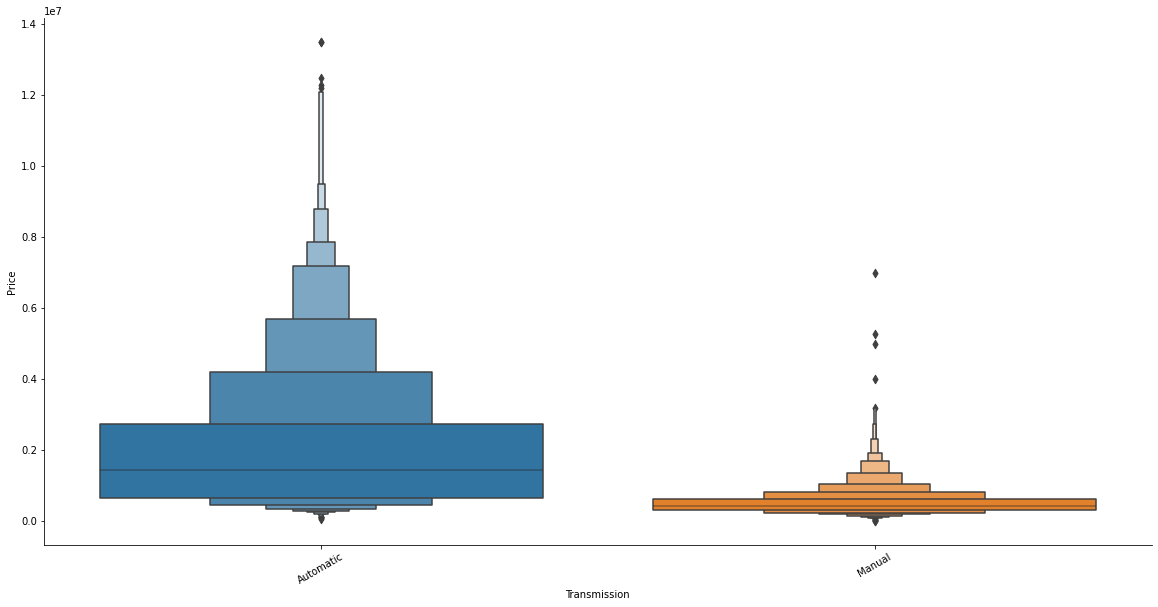

In [40]:
a=sn.catplot(y="Price",x="Transmission",data=df.sort_values("Price",ascending=False),kind="boxen", height = 8, aspect = 2)
a.set_xticklabels(rotation=30)

We can see that Automatic Transmission has overall higher Price Than the Manual Transmission

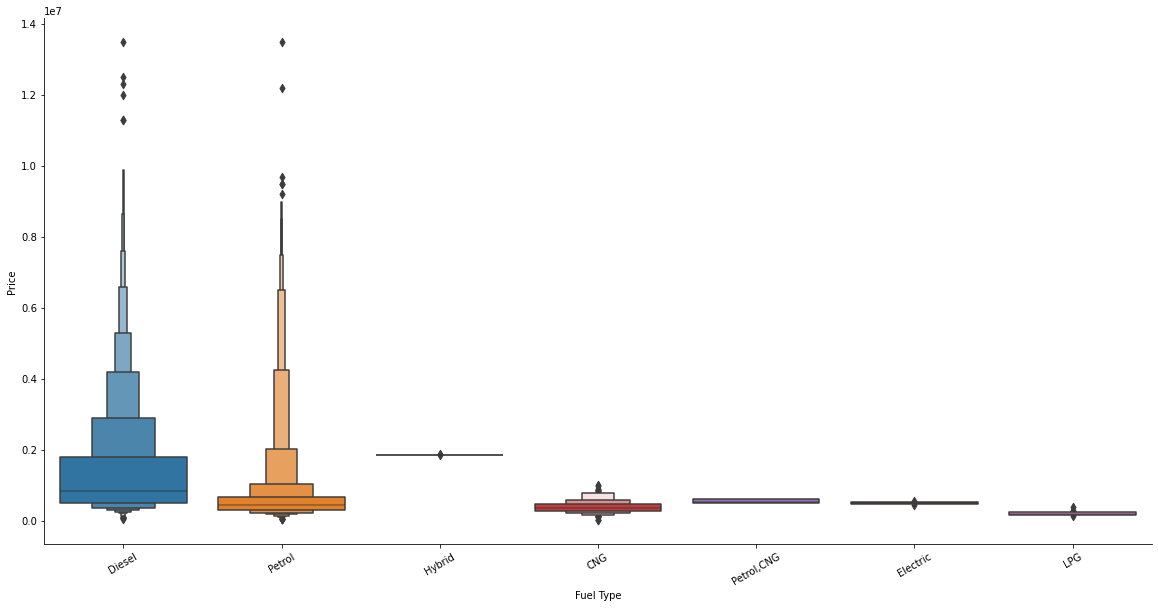

In [41]:
a=sn.catplot(y="Price",x="Fuel Type",data=df.sort_values("Price",ascending=False),kind="boxen", height = 8, aspect = 2)
a.set_xticklabels(rotation=30)

From Here We can conclude that most of the cars runs on Either Diesel or Petrol and Diesel cars tend to have a higher price than the Petrol

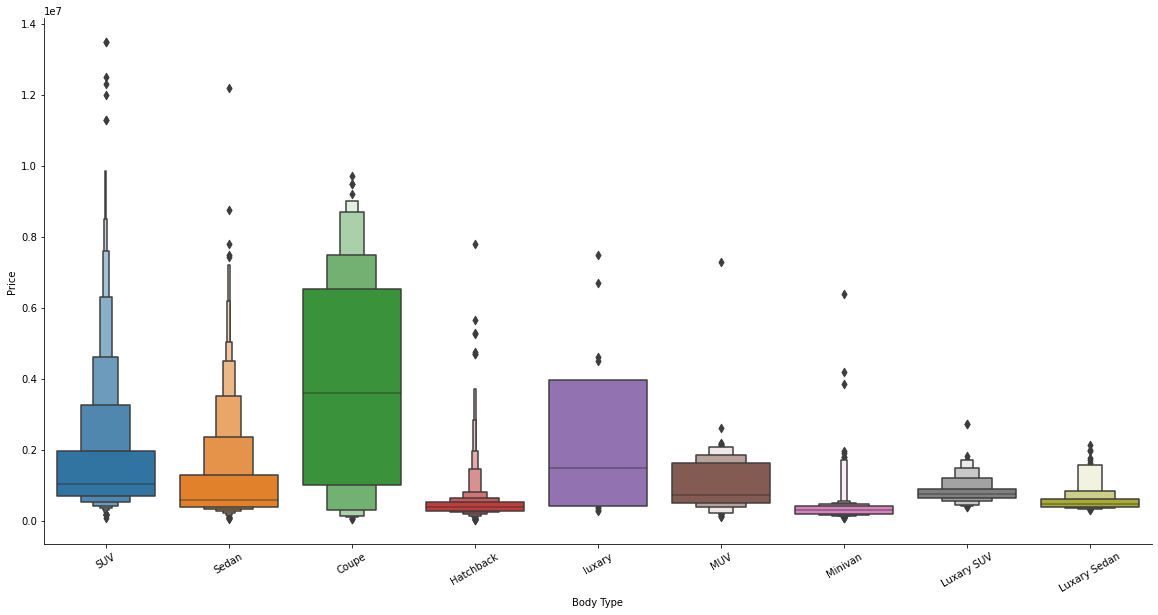

In [42]:
a=sn.catplot(y="Price",x="Body Type",data=df.sort_values("Price",ascending=False),kind="boxen", height = 8, aspect = 2)
a.set_xticklabels(rotation=30)

Coupe and Luxary vehicles have a consistent price and SUV Sedan and Coupe has the hiest price among all

# Distplot

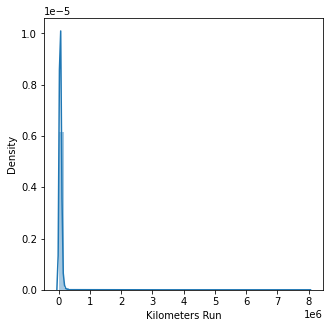

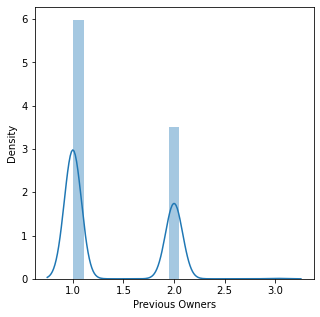

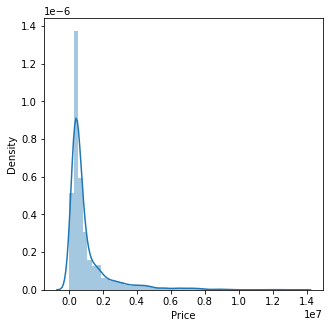

In [44]:
for column in numerical:
        plt.figure(figsize=(5,5))
        sn.distplot(df[column])

We can see that Kilometers and Price is right skewed which we will handle later.

# Boxplot

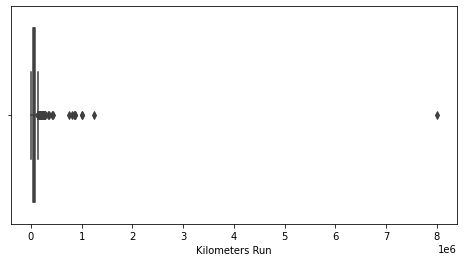

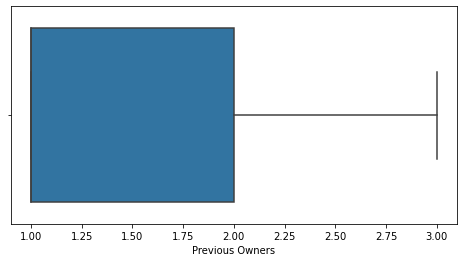

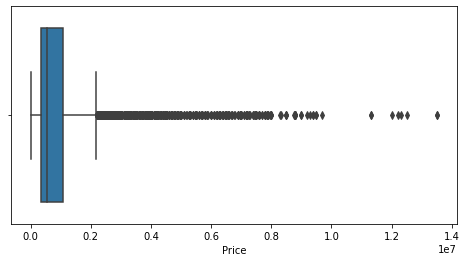

In [45]:
for column in numerical:
        plt.figure(figsize=(8,4))
        sn.boxplot(x=column,data=df)

We can see that Kilometers and Price has many outliers.

# Encoding

In [47]:
from sklearn.preprocessing import LabelEncoder

In [48]:
le = LabelEncoder()

for i in catagory:
    df[i] = le.fit_transform(df[i].astype(str))

# Histogram

array([[<AxesSubplot:title={'center':'Transmission'}>,
        <AxesSubplot:title={'center':'Fuel Type'}>],
       [<AxesSubplot:title={'center':'Body Type'}>,
        <AxesSubplot:title={'center':'Kilometers Run'}>],
       [<AxesSubplot:title={'center':'Previous Owners'}>,
        <AxesSubplot:title={'center':'Price'}>]], dtype=object)

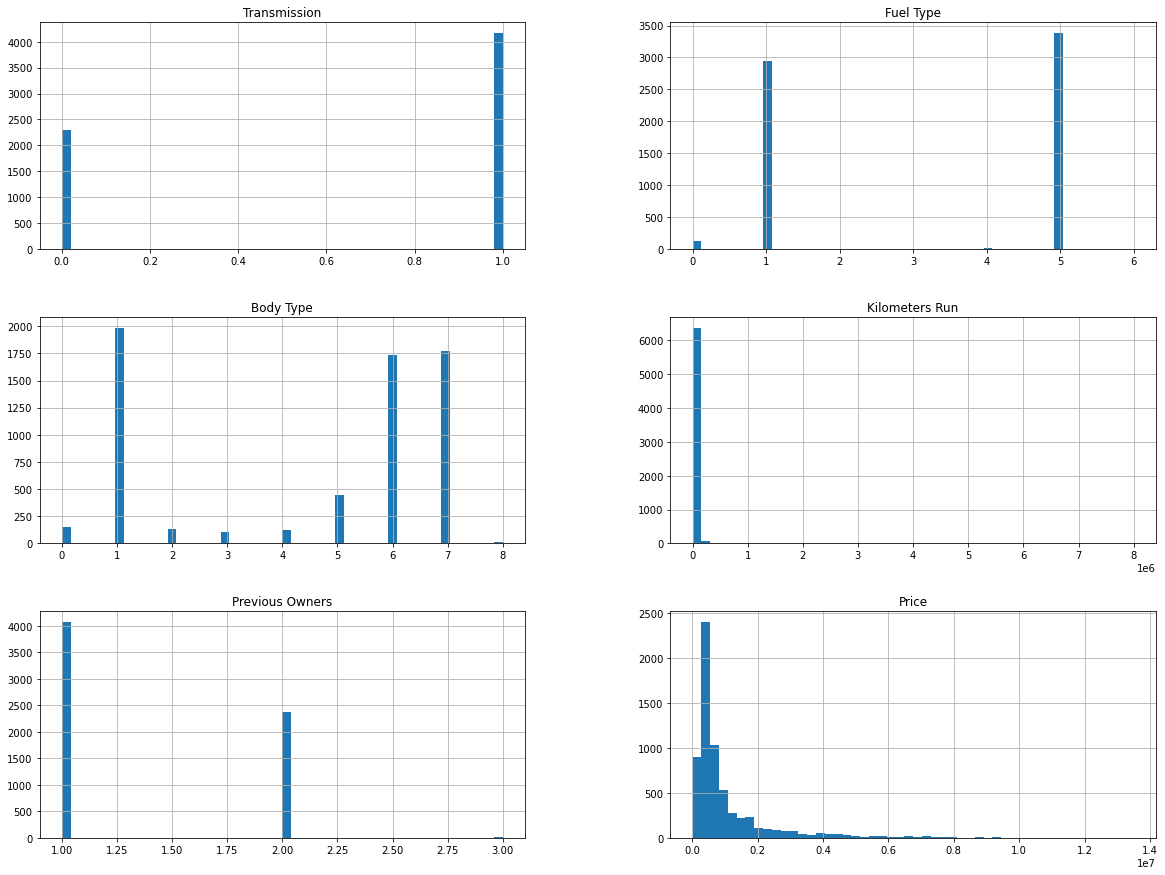

In [51]:
df.hist(bins=50,figsize=(20,15))

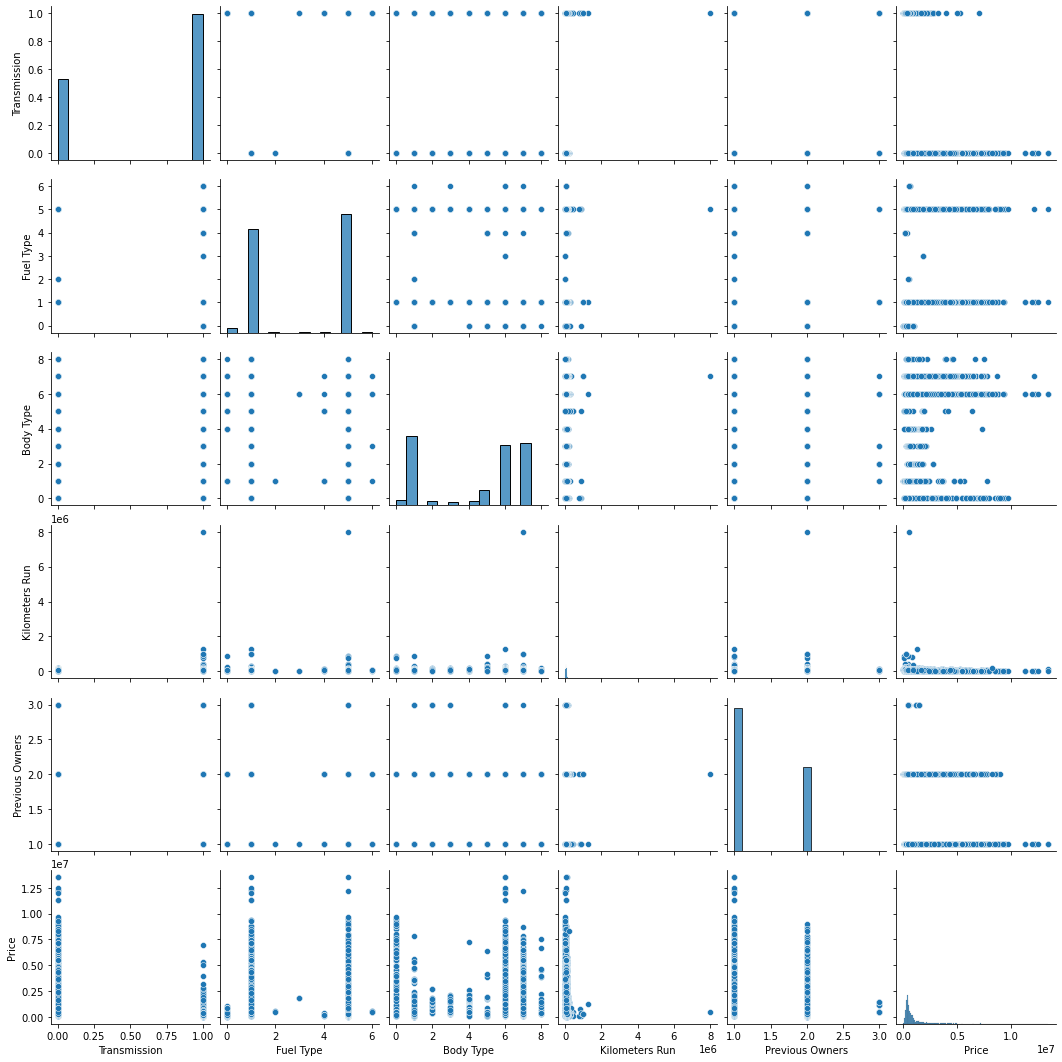

In [54]:
sn.pairplot(df)

<AxesSubplot:>

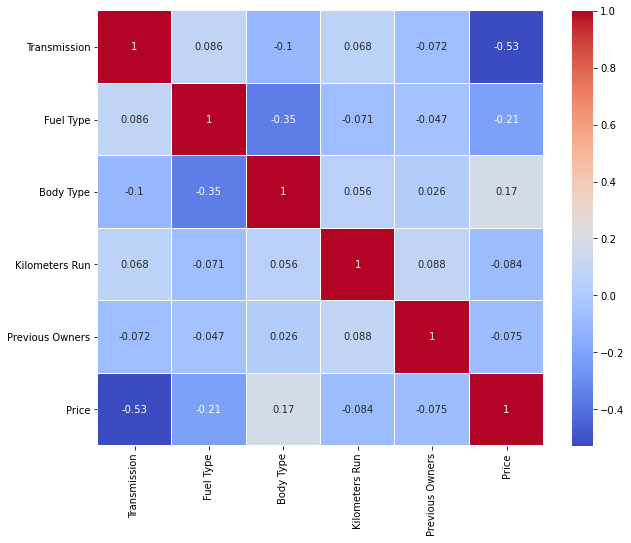

In [59]:
plt.figure(figsize=(10,8))
sn.heatmap(df.corr(),linewidths=.1,cmap="coolwarm", annot=True)

Transmission has a high negetive correlation with Price

# Removing Outliers

In [60]:
from scipy.stats import zscore

In [63]:
z=np.abs(zscore(df))
df=df[(z<3).all(axis=1)]

In [65]:
df.shape

(6266, 6)

# Skewness Removal

In [66]:
df.skew()

Transmission      -0.682029
Fuel Type         -0.127240
Body Type         -0.427204
Kilometers Run     1.309334
Previous Owners    0.526211
Price              2.256921
dtype: float64

In [68]:
from scipy.stats import boxcox

### Kilometers Run

In [73]:
k=boxcox(df["Kilometers Run"])[0]
pd.Series(k).skew()

0.013217632716092926

In [74]:
df["Kilometers Run"]=k

### Price

In [75]:
p=boxcox(df["Price"])[0]
pd.Series(p).skew()

-0.01101032824264524

In [76]:
df["Price"]=p

# Input Splitting

In [77]:
x=df.drop(["Price"],axis=1)

In [78]:
y=df["Price"]

# Finding The Best Model

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [84]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,train_size=0.20,random_state=7)

In [85]:
#regress function
from sklearn.model_selection import cross_val_score,train_test_split
def regress(model,x,y):
    
    #train the model
    model.fit(X_train,Y_train)
    ac=model.score(X_test,Y_test)*100
    print("R2:",ac)
    
    #cross validation
    score=cross_val_score(model,x,y,cv=5)
    cv=np.mean(score)*100
    print("CV Score:",cv)
    
    #diffrence between them
    print("Diffrence:",abs(ac-cv))

In [86]:
LR=LinearRegression()
regress(LR,x,y)

R2: 56.19229261051502
CV Score: 45.84958829804607
Diffrence: 10.342704312468946


In [87]:
DTR = DecisionTreeRegressor()
regress(DTR,x,y)

R2: 37.31856341520915
CV Score: 27.240007994491798
Diffrence: 10.07855542071735


In [88]:
RDG=Ridge()
regress(RDG,x,y)

R2: 56.18635798506186
CV Score: 45.853948384783
Diffrence: 10.332409600278858


In [89]:
LSO=Lasso()
regress(LSO,x,y)

R2: 4.0324965357741105
CV Score: -14.463301217767368
Diffrence: 18.495797753541478


In [90]:
RFR=RandomForestRegressor()
regress(RFR,x,y)

R2: 57.094825771694026
CV Score: 43.68630878100647
Diffrence: 13.40851699068756


In [91]:
KNR=KNeighborsRegressor()
regress(KNR,x,y)

R2: 20.531292684030234
CV Score: 16.931336981720793
Diffrence: 3.5999557023094404


In [92]:
XGB=XGBRegressor()
regress(XGB,x,y)

R2: 57.35404298294235
CV Score: 51.95196644657678
Diffrence: 5.40207653636557


XGBRegressor is our best model

# Hyper Parameter Tuning¶

In [93]:
XGB.get_params()

{'objective': 'reg:squarederror',
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'enable_categorical': False,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 12,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

In [102]:
params = {  'max_depth':[2,4,6],
    'min_child_weight': [1,2,3],
    'eta':[.1,.2,.3],
    'subsample': [1,2,3],
    'colsample_bytree': [1,2,3],
    'objective':['reg:squarederror','binary:logistic','multi:softmax']}

In [103]:
from sklearn.model_selection import GridSearchCV

In [104]:
gs = GridSearchCV(XGB, params, verbose = 1, cv=3, n_jobs = -1)

In [105]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,train_size=0.25,random_state=7)
gs.fit(X_train, Y_train)

Fitting 3 folds for each of 729 candidates, totalling 2187 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1,
                                    enable_categorical=False, eta=0.1, gamma=0,
                                    gpu_id=-1, importance_type=None,
                                    interaction_constraints='',
                                    learning_rate=0.100000001, max_delta_step=0,
                                    max_depth=2, min_child_weight=2,
                                    missing=nan, monotone_constraints='()',
                                    n_estima...
                                    predictor='auto', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', validate_parameters=1,
         

In [106]:
gs.best_params_

{'colsample_bytree': 1,
 'eta': 0.1,
 'max_depth': 2,
 'min_child_weight': 3,
 'objective': 'reg:squarederror',
 'subsample': 1}

# Checking Accuracy Score

In [107]:
XGB=XGBRegressor(colsample_bytree= 1,
 eta= 0.1,
 max_depth= 2,
 min_child_weight= 2,
 objective= 'reg:squarederror',
 subsample= 1)

In [108]:
XGB.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             eta=0.1, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.100000001,
             max_delta_step=0, max_depth=2, min_child_weight=2, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [109]:
XGB.score(X_test,Y_test)

0.6548835704598877

In [110]:
y_test_pred=XGB.predict(X_test)

In [111]:
print(XGB.score(X_test, y_test_pred))

1.0


# Finally Saving our model

In [113]:
import joblib
joblib.dump(XGB,r"C:\Users\Avinash\Desktop\Internship\Project\Car-Price_Prediction\Car Price Prediction\price.pkl")

['C:\\Users\\Avinash\\Desktop\\Internship\\Project\\Car-Price_Prediction\\Car Price Prediction\\price.pkl']